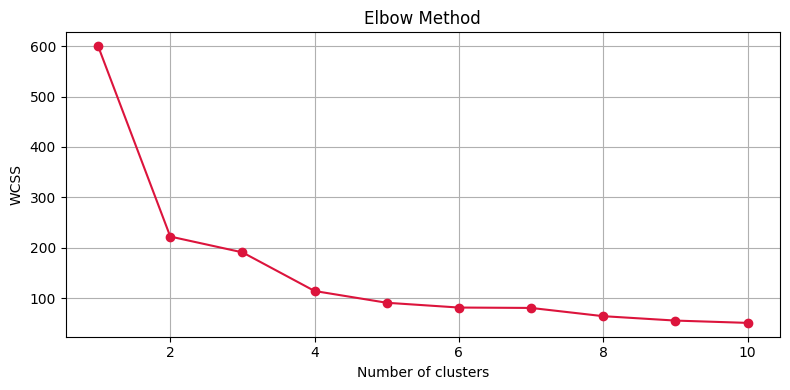

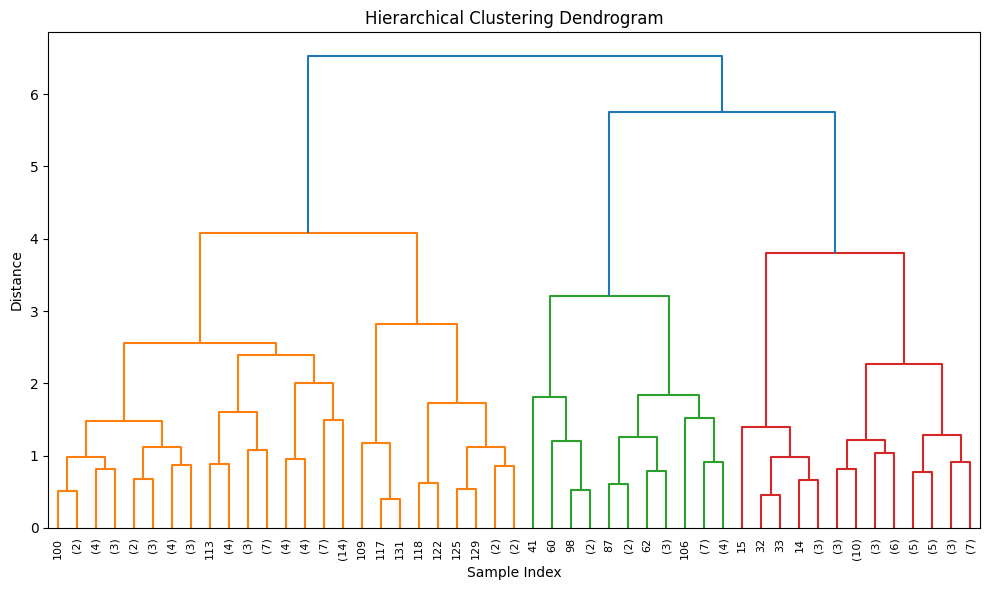

KMeans Cluster Counts:
KMeans_Cluster
0    96
1    33
2    21
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical_Cluster
0    77
1    49
2    24
Name: count, dtype: int64

KMeans Cluster Centers (scaled):
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Cluster Summary by KMeans:
                sepal length (cm)  sepal width (cm)  petal length (cm)  \
KMeans_Cluster                                                           
0                        6.314583          2.895833           4.973958   
1                        5.169697          3.630303           1.493939   
2                        4.747619          2.895238           1.757143   

                petal width (cm)  Hierarchical_Cluster  
KMeans_Cluster                                          
0                       1.703125              0.395833  
1                       0.272727              1.00000

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', color='crimson')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_method.png")
plt.show()

linked = linkage(data_scaled, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("dendrogram.png")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
df['KMeans_Cluster'] = kmeans_labels

agglo = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
agglo_labels = agglo.fit_predict(data_scaled)
df['Hierarchical_Cluster'] = agglo_labels

print("KMeans Cluster Counts:")
print(df['KMeans_Cluster'].value_counts())

print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())

print("\nKMeans Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

cluster_summary = df.groupby('KMeans_Cluster').mean()
print("\nCluster Summary by KMeans:")
print(cluster_summary)
